# Plotly Pie plots with Dimensions data

* https://plotly.com/python/pie-charts/ walkthrough guide
* https://plotly.com/python-api-reference/generated/plotly.express.pie.html#plotly.express.pie full docs

In [3]:
import os
import sys
import time
import json
import pandas as pd
from pandas import json_normalize
from tqdm.notebook import tqdm as progress
import plotly.express as px
from plotly.offline import plot
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports 
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#
import dimcli
from dimcli.shortcuts import *
#
dimcli.login()
dsl = dimcli.Dsl()

DimCli v0.6.6.4 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


### Testing out plotly_express with DSL data

In [10]:
q = """search publications for "malaria" where research_org_country_names="Italy" and year < 2010 return publications[basics] limit 500"""
data = dslquery(q)

Returned Publications: 500 (total = 4325)
WARNINGS [1]
Field 'author_affiliations' is deprecated in favor of authors. Please refer to https://docs.dimensions.ai/dsl/releasenotes.html for more details


In [37]:
df = data.as_dataframe()
df = df.fillna("")

In [8]:
df.head(5)

,pages,issue,type,title,author_affiliations,year,id,volume,journal.id,journal.title
0,213-372,2,article,LE ZANZARE ITALIANE: GENERALITÀ E IDENTIFICAZI...,"[[{'first_name': 'Francesco', 'last_name': 'Se...",2009,pub.1032403232,41,jour.1295566,Fragmenta entomologica
1,e1000272,12,article,Transglutaminase-Mediated Semen Coagulation Co...,"[[{'first_name': 'David W.', 'last_name': 'Rog...",2009,pub.1052568629,7,jour.1032549,PLOS Biology
2,e8245,12,article,IgG Autoantibody to Brain Beta Tubulin III Ass...,"[[{'first_name': 'Devendra', 'last_name': 'Ban...",2009,pub.1007487910,4,jour.1037553,PLoS ONE
3,1957-1957,12,article,Cover Picture: Interaction of Artemisinins wit...,"[[{'first_name': 'Paolo', 'last_name': 'Coghi'...",2009,pub.1026635135,4,jour.1036021,ChemMedChem
4,2045-2053,12,article,Interaction of Artemisinins with Oxyhemoglobin...,"[[{'first_name': 'Paolo', 'last_name': 'Coghi'...",2009,pub.1006821510,4,jour.1036021,ChemMedChem


### Basic Pie Charts

In general, pie charts require a mapping from name to a value (number).

In [23]:
temp = df.groupby("type", as_index=False).count()
temp

,type,pages,issue,title,author_affiliations,year,id,volume,journal.id,journal.title
0,article,404,404,404,404,404,404,404,404,404
1,chapter,86,86,86,86,86,86,86,86,86
2,monograph,2,2,2,2,2,2,2,2,2
3,preprint,7,7,7,7,7,7,7,7,7
4,proceeding,1,1,1,1,1,1,1,1,1


#### Counting Pub Type

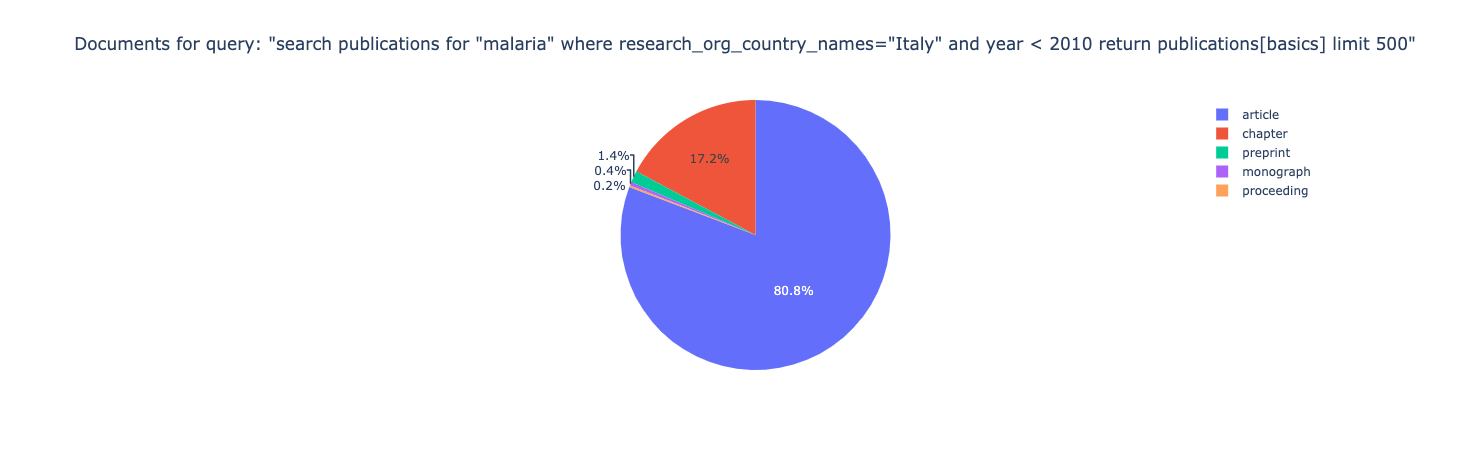

In [24]:
temp = df.groupby("type", as_index=False).count()
px.pie(temp, 
       names="type", # the dimension for the slices
       values="id",  # the metric
       title=f"Documents for query: \"{q}\"")

#### Counting Years

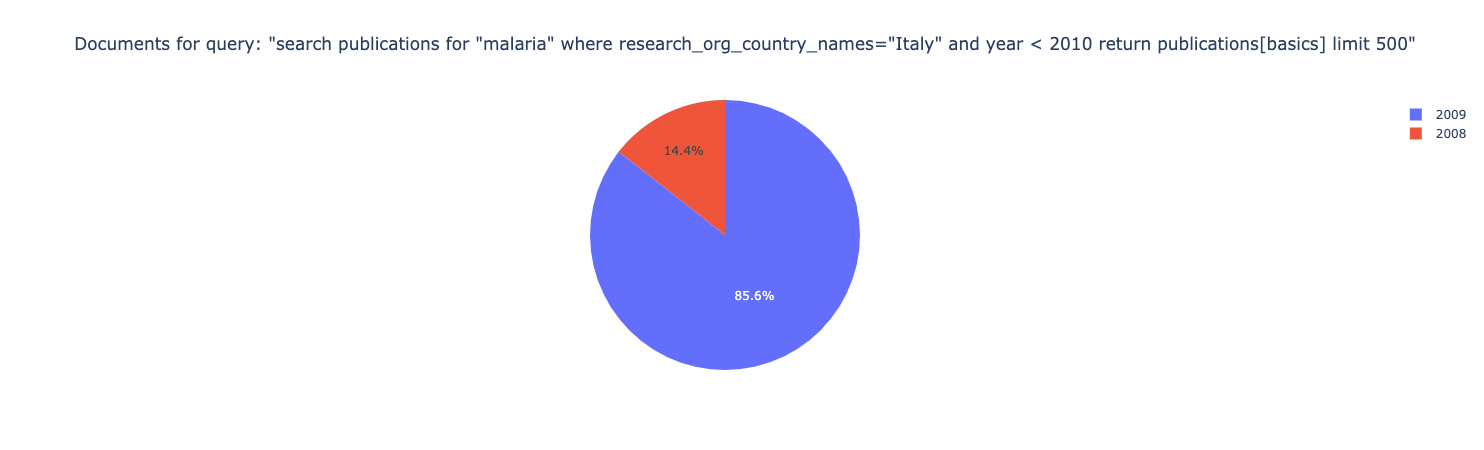

In [25]:
temp = df.groupby("year", as_index=False).count()
px.pie(temp, 
       names="year", # the dimension for the slices
       values="id",  # the metric
       title=f"Documents for query: \"{q}\"")

#### Changing colors

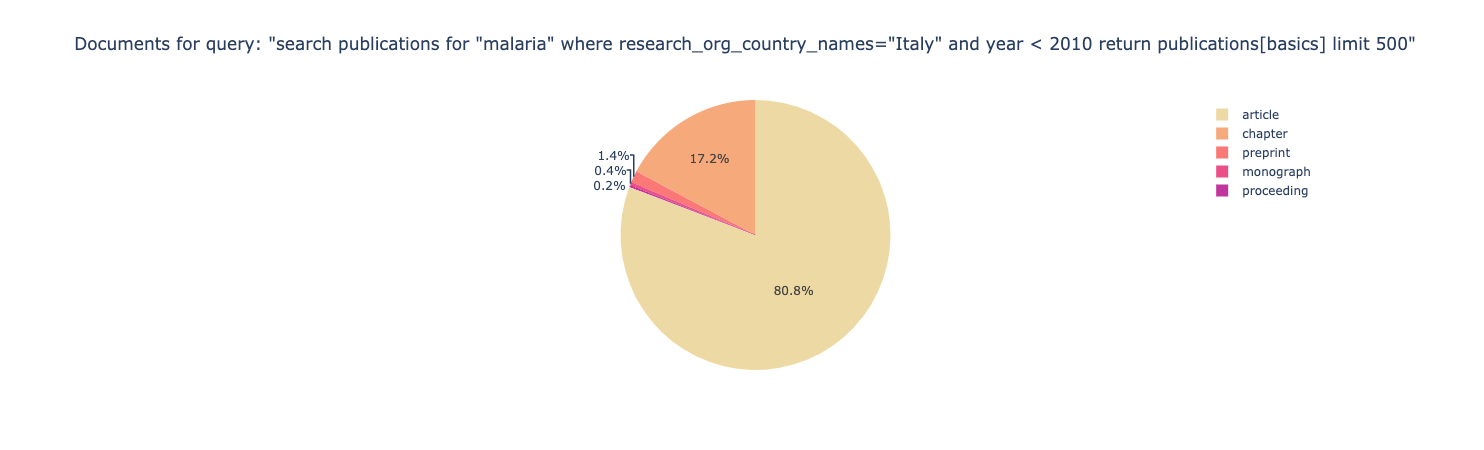

In [36]:
temp = df.groupby("type", as_index=False).count()
px.pie(temp, 
       names="type", # the dimension for the slices
       values="id",  # the metric
       color_discrete_sequence=px.colors.sequential.Agsunset_r,
       title=f"Documents for query: \"{q}\"")



#### More customizations

* `labels` is the mapping of field names to human-readable names

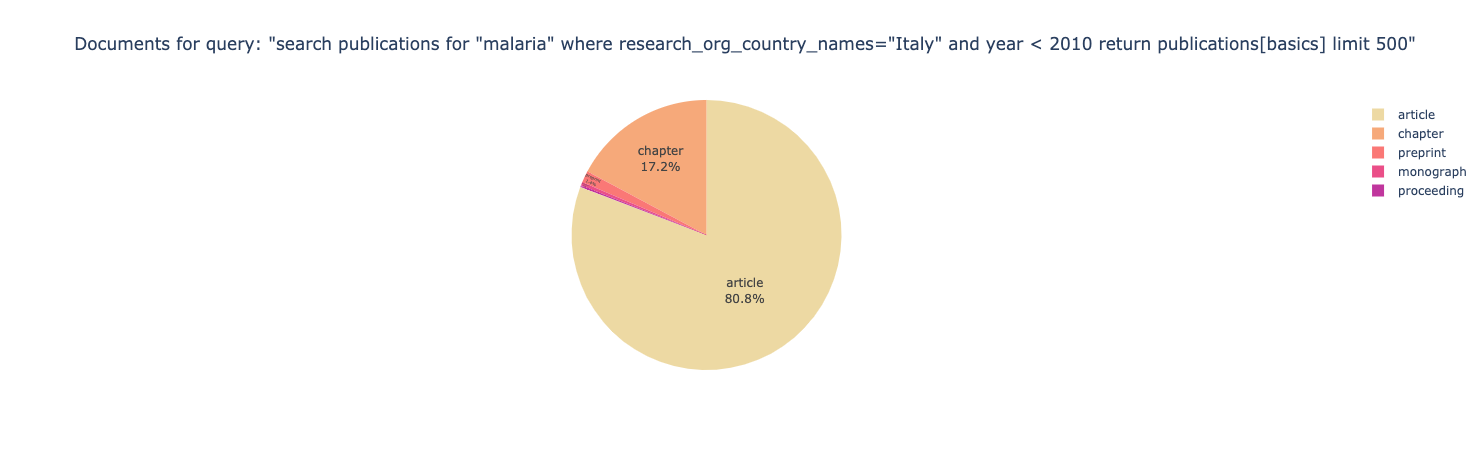

In [34]:
temp = df.groupby("type", as_index=False).count()
fig = px.pie(temp, 
       names="type", # the dimension for the slices
       values="id",  # the metric
       color_discrete_sequence=px.colors.sequential.Agsunset_r,
       title=f"Documents for query: \"{q}\"", 
       hover_data=['id'], 
       labels={'id':'count of publications'} # rename field
      )
fig.update_traces(textposition='inside', textinfo='percent+label') # Any combination of ['label', 'text', 'value', 'percent'] joined with '+' characters
fig.show()

#### Lots of data - fails

* more than 20 is already too much
* also make sure to remove blank values

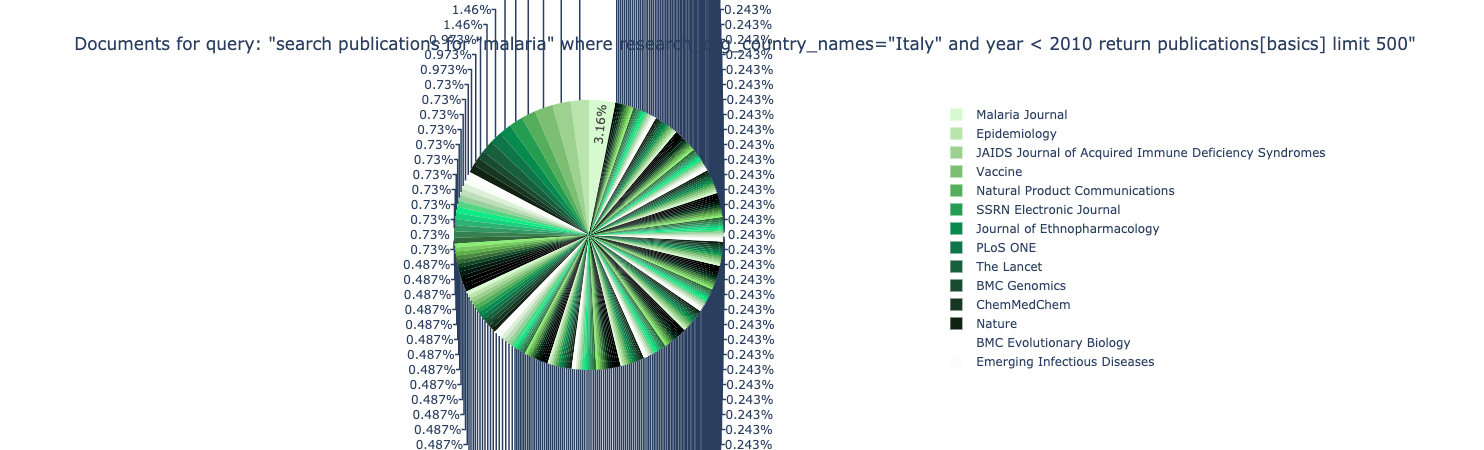

In [43]:
temp = df[df['journal.title'] != '']
temp =temp.groupby("journal.title", as_index=False).count()
px.pie(temp, 
       names="journal.title", # the dimension for the slices
       values="id",  # the metric
       color_discrete_sequence=px.colors.sequential.algae,
       title=f"Documents for query: \"{q}\"")



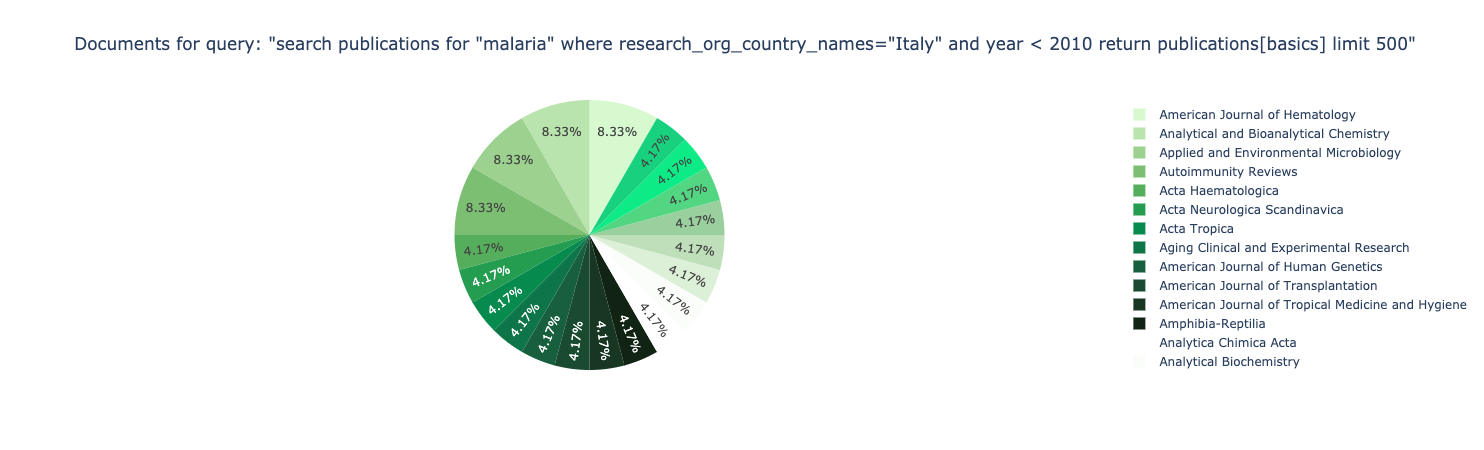

In [45]:
temp = df[df['journal.title'] != '']
temp =temp.groupby("journal.title", as_index=False).count()

px.pie(temp[:20], 
       names="journal.title", # the dimension for the slices
       values="id",  # the metric
       color_discrete_sequence=px.colors.sequential.algae,
       title=f"Documents for query: \"{q}\"")


### Donought Chart 

* simply use the `hole` control

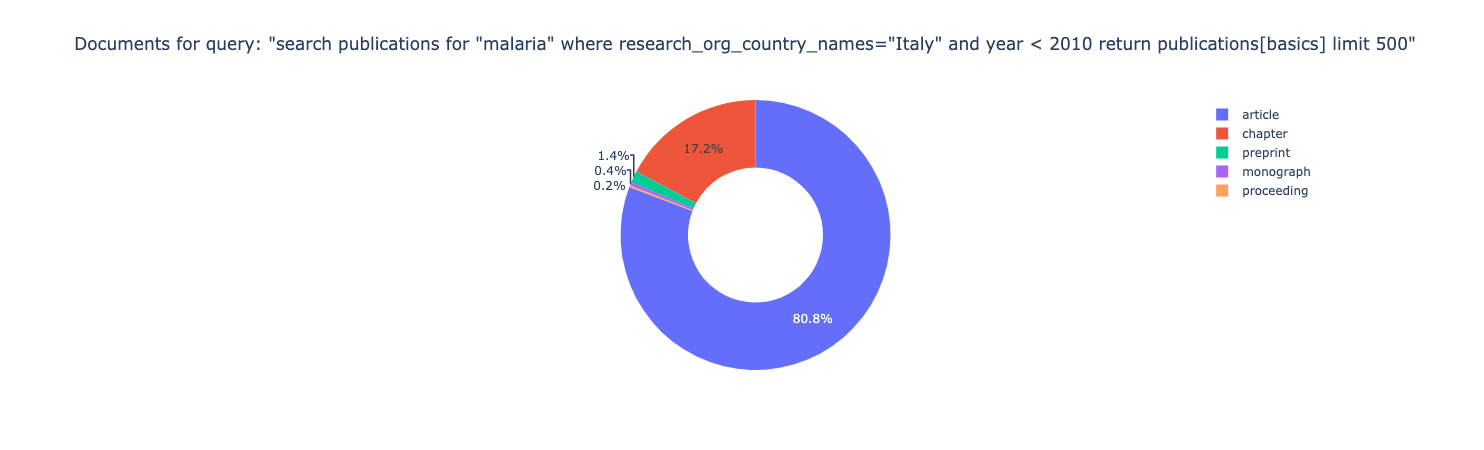

In [48]:
temp = df.groupby("type", as_index=False).count()
px.pie(temp, 
       names="type", # the dimension for the slices
       values="id",  # the metric
       hole=0.5,
       title=f"Documents for query: \"{q}\"")